Name: **Sheikh Muhammad Asaj Ibtisam Nipun**\
ID: **2215151017**\
Section: **7A1**\
Course: **Simulation & Modeling LAB**

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Task
### Generate two sets of from a normal distribution and perform a two-sample t-test.
- Randomly generate 50 values from a normal distribution with a chosen mean (μ1) and standard deviation.
- Randomly generate 50 values from a normal distribution with a different mean (μ2) and standard deviation.

**Use and determine whether the means differ significantly.**

Average of Group A: 49.88
Average of Group B: 56.21
T-Statistic: -2.69
Degrees of Freedom: 97.06
P-Value: 0.0085
95% Confidence Interval for Mean Difference: [-11.01, -1.65]


Conclusion: We reject the null hypothesis. There is a significant difference between the two groups.


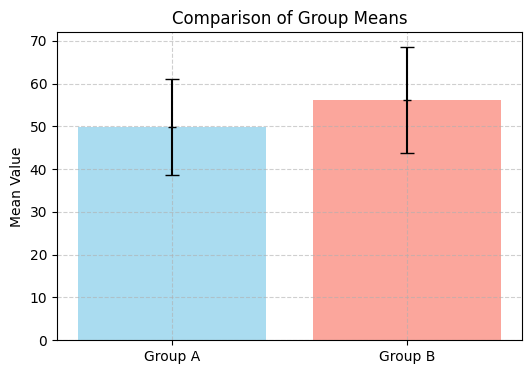

In [3]:
mean_A, std_A = 50, 10
mean_B, std_B = 55, 12

sample_A = np.random.normal(mean_A, std_A, 50)
sample_B = np.random.normal(mean_B, std_B, 50)

t_statistic, p_val = stats.ttest_ind(sample_A, sample_B, equal_var=False)

mean_difference = np.mean(sample_A) - np.mean(sample_B)
std_error = np.sqrt(np.var(sample_A, ddof=1)/len(sample_A) + np.var(sample_B, ddof=1)/len(sample_B))
degrees_freedom = (std_error**4) / ((np.var(sample_A, ddof=1)/len(sample_A))**2 / (len(sample_A)-1) + (np.var(sample_B, ddof=1)/len(sample_B))**2 / (len(sample_B)-1))
confidence_interval = stats.t.interval(0.95, degrees_freedom, loc=mean_difference, scale=std_error)

print(f"Average of Group A: {np.mean(sample_A):.2f}")
print(f"Average of Group B: {np.mean(sample_B):.2f}")
print(f"T-Statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {degrees_freedom:.2f}")
print(f"P-Value: {p_val:.4f}")
print(f"95% Confidence Interval for Mean Difference: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")
print('\n')

significance_level = 0.05
if p_val < significance_level:
    print("Conclusion: We reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Conclusion: We fail to reject the null hypothesis. No significant difference between the groups.")

plt.figure(figsize=(6, 4))
plt.bar(['Group A', 'Group B'], [np.mean(sample_A), np.mean(sample_B)], color=['skyblue', 'salmon'], alpha=0.7)
plt.errorbar(['Group A', 'Group B'], [np.mean(sample_A), np.mean(sample_B)], yerr=[np.std(sample_A, ddof=1), np.std(sample_B, ddof=1)], fmt='k_', capsize=5)
plt.title('Comparison of Group Means')
plt.ylabel('Mean Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()